In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/sample_data/dev.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0
1,4,udp,private,SF,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0
2,0,tcp,http,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0
3,0,tcp,http,SF,310,2268,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0
4,0,udp,domain_u,SF,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345815 entries, 0 to 345814
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     345815 non-null  int64  
 1   protocol_type                345815 non-null  object 
 2   service                      345815 non-null  object 
 3   flag                         345815 non-null  object 
 4   src_bytes                    345815 non-null  int64  
 5   dst_bytes                    345815 non-null  int64  
 6   land                         345815 non-null  int64  
 7   wrong_fragment               345815 non-null  int64  
 8   urgent                       345815 non-null  int64  
 9   hot                          345815 non-null  int64  
 10  num_failed_logins            345815 non-null  int64  
 11  logged_in                    345815 non-null  int64  
 12  num_compromised              345815 non-null  int64  
 13 

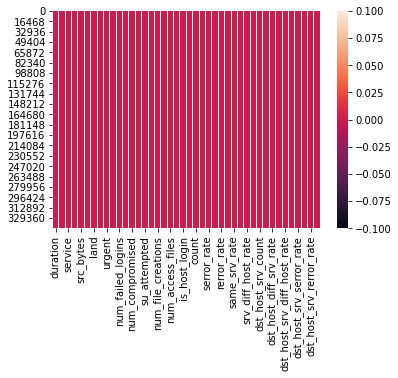

In [5]:
#visualize null values
sns.heatmap(df.isnull())
plt.show()

In [6]:
df_num=df.select_dtypes(["float64","int64"])
df_cat=df.select_dtypes("object")

In [7]:
#apply LabelEncoder
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    #create object of LabelEncoder
    le=LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
#check
df_cat.head()

,protocol_type,service,flag
0,2,45,9
1,2,45,9
2,1,22,1
3,1,22,9
4,2,11,9


In [8]:
df_new = pd.concat([df_num,df_cat],axis=1)
df_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,protocol_type,service,flag
0,0,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,94,56,0.60,0.03,0.01,0.00,0.0,0.0,0.0,0.00,0,2,45,9
1,4,105,147,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,250,0.98,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0,2,45,9
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,13,255,1.00,0.00,0.08,0.24,0.0,0.0,1.0,0.99,0,1,22,1
3,0,310,2268,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,255,1.00,0.00,0.05,0.04,0.0,0.0,0.0,0.00,0,1,22,9
4,0,46,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,54,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0,2,11,9


In [9]:
X=df_new.drop("class",axis=1) 
Y=df_new["class"] 

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [36]:
def create_model(model):
    model.fit(X_train,Y_train)#we train the model
    y_pred=model.predict(X_test) #test
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression  

In [39]:
lr=LogisticRegression()

In [15]:
lr=create_model(lr) 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     20495
           1       1.00      0.98      0.99     83250

    accuracy                           0.98    103745
   macro avg       0.96      0.99      0.97    103745
weighted avg       0.98      0.98      0.98    103745

Confusion Matrix : 
[[20346   149]
 [ 1542 81708]]


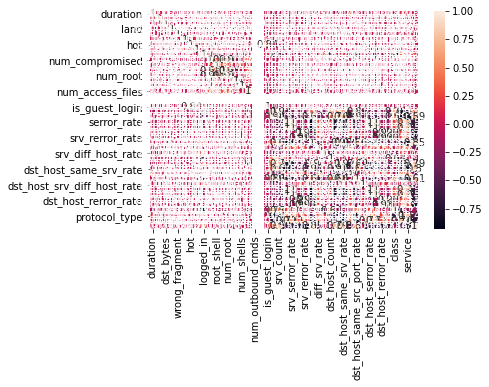

In [16]:
#we visualise corr()
sns.heatmap(df_new.corr(),annot=True)
plt.show()

In [17]:
from sklearn.ensemble import BaggingClassifier 

In [18]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1)

In [19]:
X_train.shape

(242070, 41)

In [20]:
create_model(bc)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20495
           1       1.00      0.99      0.99     83250

    accuracy                           0.99    103745
   macro avg       0.97      0.99      0.98    103745
weighted avg       0.99      0.99      0.99    103745

Confusion Matrix : 
[[20224   271]
 [ 1043 82207]]


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=780, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, ve

In [21]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=780,random_state=1,bootstrap=False)

In [22]:
create_model(bc1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     20495
           1       1.00      0.99      0.99     83250

    accuracy                           0.99    103745
   macro avg       0.97      0.99      0.98    103745
weighted avg       0.99      0.99      0.99    103745

Confusion Matrix : 
[[20220   275]
 [ 1052 82198]]


BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=780, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=1, v

In [23]:
#import RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier 

In [40]:
rf=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [41]:
create_model(rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20495
           1       1.00      1.00      1.00     83250

    accuracy                           1.00    103745
   macro avg       1.00      1.00      1.00    103745
weighted avg       1.00      1.00      1.00    103745

Confusion Matrix : 
[[20493     2]
 [   34 83216]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)